Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


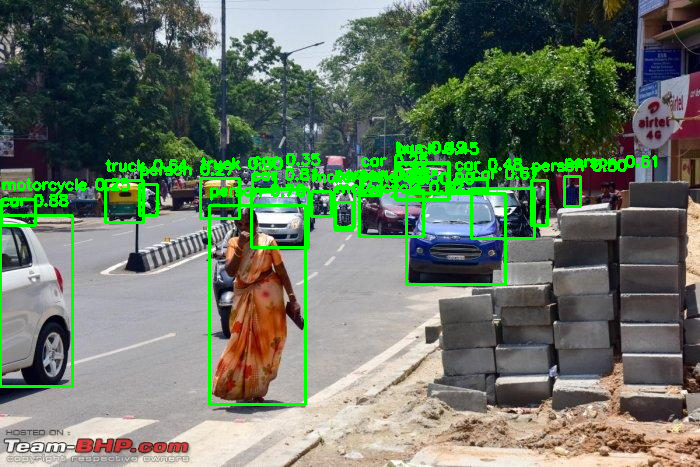

In [2]:
import torch
import cv2
import os
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load YOLOv5 model (pre-trained on COCO dataset)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Define image path (Replace with your image path)
image_path = "/content/objects.jpg"

# Check if the file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Error: The image file '{image_path}' was not found.")

# Load the image using OpenCV
img = cv2.imread(image_path)

# Check if image was loaded correctly
if img is None:
    raise ValueError("Error: Unable to load the image. Please check the file format and path.")


# Convert OpenCV image (BGR) to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run YOLOv5 inference
results = model(img_rgb)

# Extract detection results
detections = results.pandas().xyxy[0]  # Bounding boxes in Pandas DataFrame format

# Loop through detections and draw bounding boxes
for _, row in detections.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    conf, name = row['confidence'], row['name']

    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display label
    label = f"{name} {conf:.2f}"
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display image with detections (for Colab)
cv2_imshow(img)